# Image processing steps

In this notebook we illustrate the different computer vision steps applied to the 3D images.
We will use the following example image in which it is shown the color image, the 3D image, the mask obtained, and the masked color image:
![Mosaic](../data/f6dd9164e8474d2f9366c53e9b2839c4_mosaico.png "Mosaic")



In [66]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import morphology

In [67]:
color_image = np.load('../data/f6dd9164e8474d2f9366c53e9b2839c4-color.npy')
img_color = Image.fromarray(color_image, 'RGB')
img_color.show()

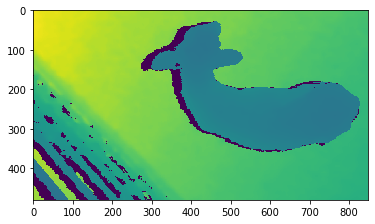

In [68]:
depth_image = np.load('../data/f6dd9164e8474d2f9366c53e9b2839c4-depth.npy')
plt.imshow(depth_image, cmap = 'viridis');
plt.savefig('../data/0_depth_orig.tif')

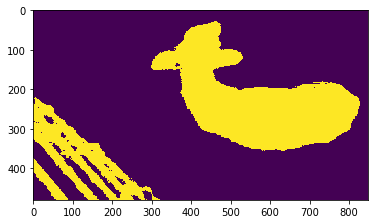

In [69]:
min_depth = 150
max_depth = 1150

depth_image[depth_image < min_depth] = 0
depth_image[depth_image > max_depth] = 0
plt.imshow(depth_image, cmap = 'viridis');

mask_depth = depth_image.astype(bool)
plt.imshow(mask_depth, cmap = 'viridis');
plt.savefig('../data/1_clipped_depth.tif')

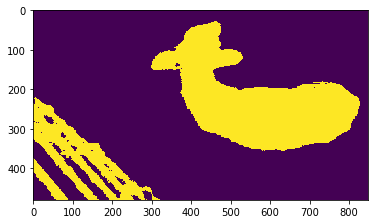

In [70]:
# Removing small objects
cleaned_mask_depth = morphology.remove_small_objects(mask_depth, min_size=500, connectivity=1)
plt.imshow(cleaned_mask_depth, cmap = 'viridis')
plt.savefig('../data/2_depth_small_objects_removed.tif')

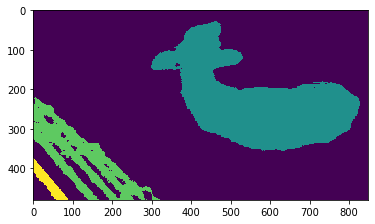

In [71]:
# Each object is labelled with a number from 0 to number of regions - 1
ret, markers = cv.connectedComponents(cleaned_mask_depth.astype(np.uint8) * 255)
markers = markers + 1  # So we will label background as 0 and regions from 1 to number of regions
markers[cleaned_mask_depth == 0] = 0  # background is region 0
plt.imshow(markers, cmap = 'viridis')
plt.savefig('../data/3_depth_connected_components.tif')

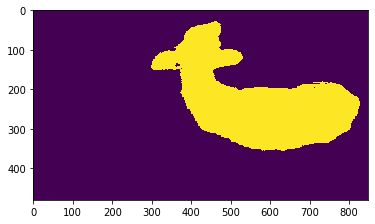

In [72]:
# Removing regions touching the borders of the image
etiquetas_borde_superior = np.unique(markers[0, :])
etiquetas_borde_inferior = np.unique(markers[-1, :])
etiquetas_borde_izquierdo = np.unique(markers[:, 0])
etiquetas_borde_derecho = np.unique(markers[:, -1])
etiquetas_bordes = np.unique(np.concatenate([etiquetas_borde_superior,
                                             etiquetas_borde_inferior,
                                             etiquetas_borde_izquierdo,
                                             etiquetas_borde_derecho]))
for label in etiquetas_bordes:
    if label > 0:
        markers[markers == label] = 0
# Applying the mask to the image a segmented image is obtained
mask = markers.astype(np.uint8) * 255
plt.imshow(mask);
plt.savefig('../data/4_depth_mask.tif')